In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv(r"D:\DATA SCIENCE\Practice\project\Customer Segmentation\segmentation\Bank Customer Churn Prediction.csv")
df

customer_id  credit_score  country  gender  age  tenure    balance  \
0        15634602           619   France  Female   42       2       0.00   
1        15647311           608    Spain  Female   41       1   83807.86   
2        15619304           502   France  Female   42       8  159660.80   
3        15701354           699   France  Female   39       1       0.00   
4        15737888           850    Spain  Female   43       2  125510.82   
...           ...           ...      ...     ...  ...     ...        ...   
9995     15606229           771   France    Male   39       5       0.00   
9996     15569892           516   France    Male   35      10   57369.61   
9997     15584532           709   France  Female   36       7       0.00   
9998     15682355           772  Germany    Male   42       3   75075.31   
9999     15628319           792   France  Female   28       4  130142.79   

      products_number  credit_card  active_member  estimated_salary  churn  
0                   1            1              1         101348.88      1  
1                   1            0              1         112542.58      0  
2                   3            1              0         113931.57      1  
3                   2            0              0          93826.63      0  
4                   1            1              1          79084.10      0  
...               ...          ...            ...               ...    ...  
9995                2            1              0          96270.64      0  
9996                1            1              1         101699.77      0  
9997                1            0              1          42085.58      1  
9998                2            1              0          92888.52      1  
9999                1            1              0          38190.78      0  

[10000 rows x 12 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [4]:
df.isna().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [5]:
df.describe()

customer_id  credit_score           age        tenure        balance  \
count  1.000000e+04  10000.000000  10000.000000  10000.000000   10000.000000   
mean   1.569094e+07    650.528800     38.921800      5.012800   76485.889288   
std    7.193619e+04     96.653299     10.487806      2.892174   62397.405202   
min    1.556570e+07    350.000000     18.000000      0.000000       0.000000   
25%    1.562853e+07    584.000000     32.000000      3.000000       0.000000   
50%    1.569074e+07    652.000000     37.000000      5.000000   97198.540000   
75%    1.575323e+07    718.000000     44.000000      7.000000  127644.240000   
max    1.581569e+07    850.000000     92.000000     10.000000  250898.090000   

       products_number  credit_card  active_member  estimated_salary  \
count     10000.000000  10000.00000   10000.000000      10000.000000   
mean          1.530200      0.70550       0.515100     100090.239881   
std           0.581654      0.45584       0.499797      57510.492818   
min           1.000000      0.00000       0.000000         11.580000   
25%           1.000000      0.00000       0.000000      51002.110000   
50%           1.000000      1.00000       1.000000     100193.915000   
75%           2.000000      1.00000       1.000000     149388.247500   
max           4.000000      1.00000       1.000000     199992.480000   

              churn  
count  10000.000000  
mean       0.203700  
std        0.402769  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

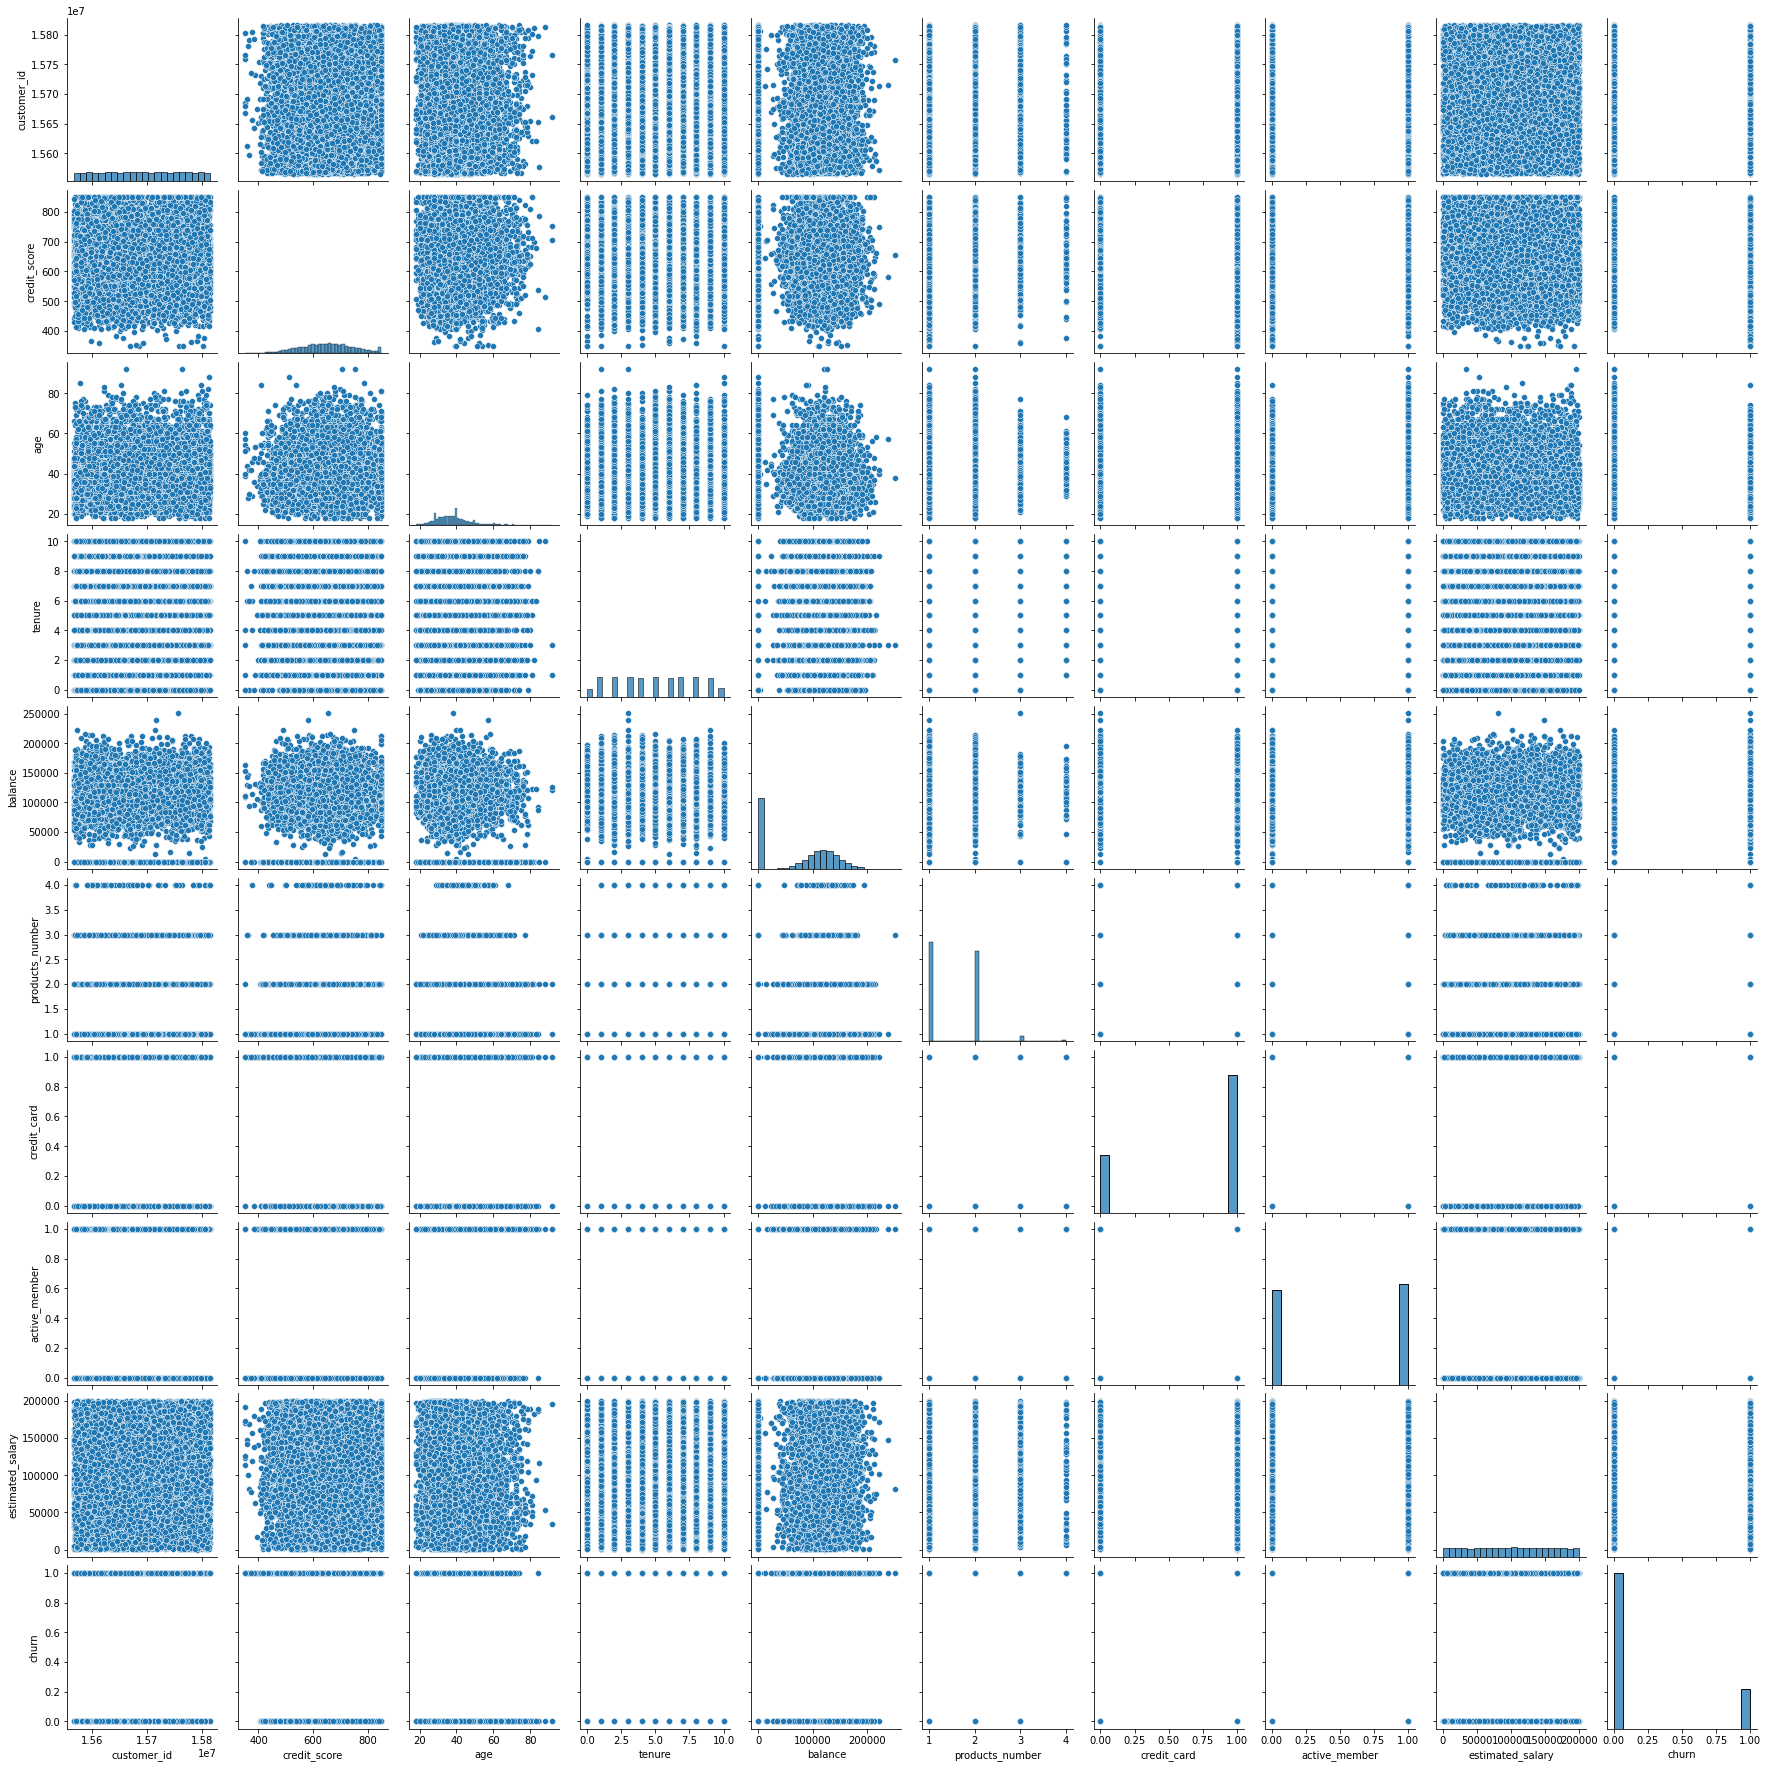

In [6]:
sns.pairplot(df)

In [7]:
import pandas_profiling
df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<AxesSubplot:xlabel='churn', ylabel='count'>

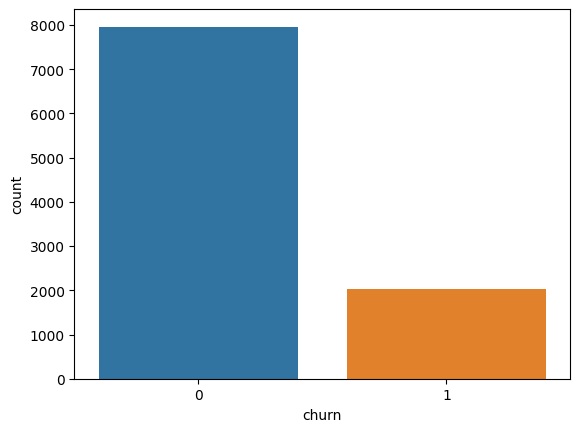

In [8]:
sns.countplot(df["churn"])

<AxesSubplot:xlabel='credit_card', ylabel='count'>

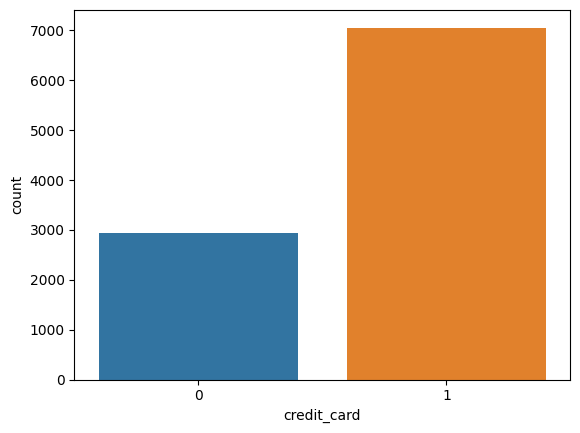

In [9]:
sns.countplot(df["credit_card"])

<AxesSubplot:xlabel='active_member', ylabel='count'>

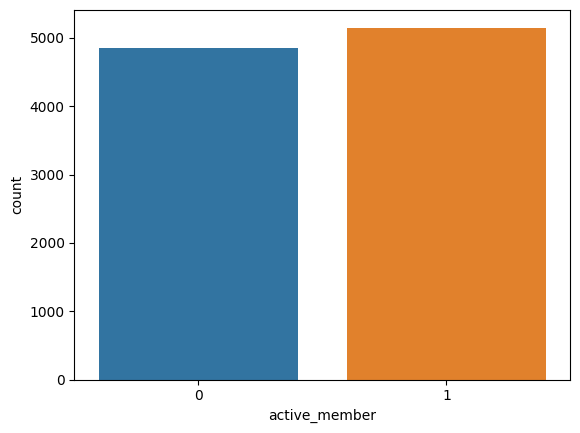

In [10]:
sns.countplot(df["active_member"])

<AxesSubplot:xlabel='country', ylabel='count'>

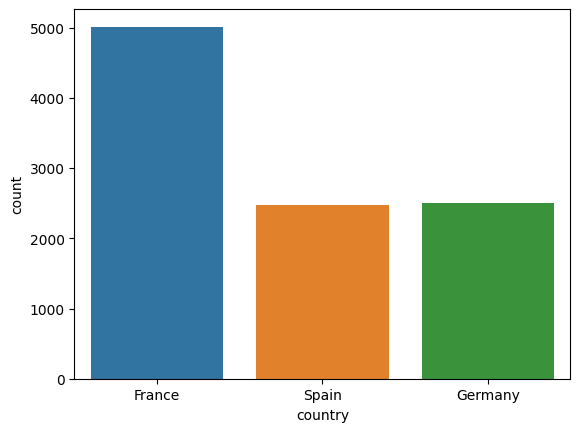

In [11]:
sns.countplot(df["country"])

# Feature Engineering

In [12]:
df=pd.get_dummies(df,columns=["country"],sparse=False)
df=pd.get_dummies(df,columns=["gender"],sparse=False)

In [13]:
df

customer_id  credit_score  age  tenure    balance  products_number  \
0        15634602           619   42       2       0.00                1   
1        15647311           608   41       1   83807.86                1   
2        15619304           502   42       8  159660.80                3   
3        15701354           699   39       1       0.00                2   
4        15737888           850   43       2  125510.82                1   
...           ...           ...  ...     ...        ...              ...   
9995     15606229           771   39       5       0.00                2   
9996     15569892           516   35      10   57369.61                1   
9997     15584532           709   36       7       0.00                1   
9998     15682355           772   42       3   75075.31                2   
9999     15628319           792   28       4  130142.79                1   

      credit_card  active_member  estimated_salary  churn  country_France  \
0               1              1         101348.88      1               1   
1               0              1         112542.58      0               0   
2               1              0         113931.57      1               1   
3               0              0          93826.63      0               1   
4               1              1          79084.10      0               0   
...           ...            ...               ...    ...             ...   
9995            1              0          96270.64      0               1   
9996            1              1         101699.77      0               1   
9997            0              1          42085.58      1               1   
9998            1              0          92888.52      1               0   
9999            1              0          38190.78      0               1   

      country_Germany  country_Spain  gender_Female  gender_Male  
0                   0              0              1            0  
1                   0              1              1            0  
2                   0              0              1            0  
3                   0              0              1            0  
4                   0              1              1            0  
...               ...            ...            ...          ...  
9995                0              0              0            1  
9996                0              0              0            1  
9997                0              0              1            0  
9998                1              0              0            1  
9999                0              0              1            0  

[10000 rows x 15 columns]

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   age               10000 non-null  int64  
 3   tenure            10000 non-null  int64  
 4   balance           10000 non-null  float64
 5   products_number   10000 non-null  int64  
 6   credit_card       10000 non-null  int64  
 7   active_member     10000 non-null  int64  
 8   estimated_salary  10000 non-null  float64
 9   churn             10000 non-null  int64  
 10  country_France    10000 non-null  uint8  
 11  country_Germany   10000 non-null  uint8  
 12  country_Spain     10000 non-null  uint8  
 13  gender_Female     10000 non-null  uint8  
 14  gender_Male       10000 non-null  uint8  
dtypes: float64(2), int64(8), uint8(5)
memory usage: 830.2 KB


In [15]:
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import kstest

In [16]:
col_list=list(df.columns)
for i in col_list:
    _,p_val=shapiro(df[i])
    print(f"The feature {i} is having p_val={p_val}")
    _,p_val=normaltest(df[i])
    print(f"The feature {i} is having p_val={p_val}")
    _,p_val=kstest(df[i],"norm")
    print(f"The feature {i} is having p_val={p_val}\n")

The feature customer_id is having p_val=0.0
The feature customer_id is having p_val=0.0
The feature customer_id is having p_val=0.0

The feature credit_score is having p_val=3.49348422601834e-20
The feature credit_score is having p_val=1.434445056038405e-29
The feature credit_score is having p_val=0.0

The feature age is having p_val=0.0
The feature age is having p_val=0.0
The feature age is having p_val=0.0

The feature tenure is having p_val=0.0
The feature tenure is having p_val=0.0
The feature tenure is having p_val=0.0

The feature balance is having p_val=0.0
The feature balance is having p_val=0.0
The feature balance is having p_val=0.0

The feature products_number is having p_val=0.0
The feature products_number is having p_val=1.3145182051633007e-181
The feature products_number is having p_val=0.0

The feature credit_card is having p_val=0.0
The feature credit_card is having p_val=0.0
The feature credit_card is having p_val=0.0

The feature active_member is having p_val=0.0
The 

In [17]:
for i in df.columns:
    print(f"The unique values from the feature {i} is {df[i].nunique()}")

The unique values from the feature customer_id is 10000
The unique values from the feature credit_score is 460
The unique values from the feature age is 70
The unique values from the feature tenure is 11
The unique values from the feature balance is 6382
The unique values from the feature products_number is 4
The unique values from the feature credit_card is 2
The unique values from the feature active_member is 2
The unique values from the feature estimated_salary is 9999
The unique values from the feature churn is 2
The unique values from the feature country_France is 2
The unique values from the feature country_Germany is 2
The unique values from the feature country_Spain is 2
The unique values from the feature gender_Female is 2
The unique values from the feature gender_Male is 2


# Feature selection

In [18]:
X=df.drop("churn",axis=1)
y=df["churn"]

In [19]:
from sklearn.feature_selection import chi2

In [20]:
_,p_val=chi2(X,y)
p_val

array([7.76680092e-30, 9.96353608e-25, 0.00000000e+00, 7.05344899e-02,
       0.00000000e+00, 2.45493956e-02, 6.98496209e-01, 1.56803624e-27,
       0.00000000e+00, 1.25300579e-13, 5.81457176e-51, 4.92250487e-06,
       3.59669973e-15, 7.01557451e-13])

<AxesSubplot:>

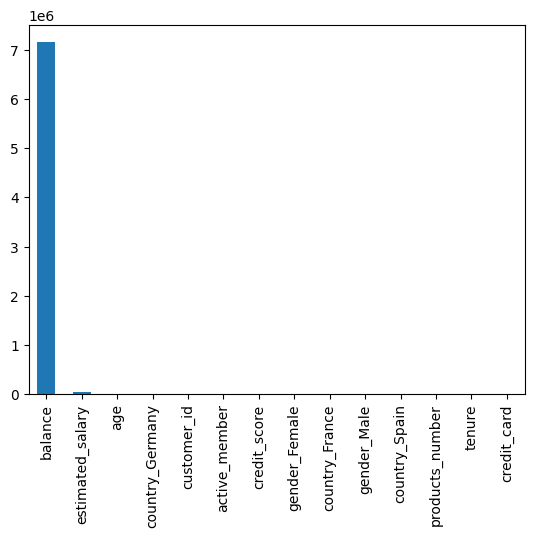

In [21]:
chi2test = pd.Series(_, index=X.columns)
chi2test.sort_values(ascending=False).plot(kind='bar')

In [22]:
from sklearn.feature_selection import f_classif

In [23]:
_,p_val=f_classif(X,y)
p_val

array([5.32150456e-001, 6.73821389e-003, 1.23993131e-186, 1.61526849e-001,
       1.27556332e-032, 1.71733300e-006, 4.75414918e-001, 1.34826852e-055,
       2.26440428e-001, 6.74844583e-026, 2.05953728e-068, 1.36665472e-007,
       1.25850456e-026, 1.25850456e-026])

<AxesSubplot:>

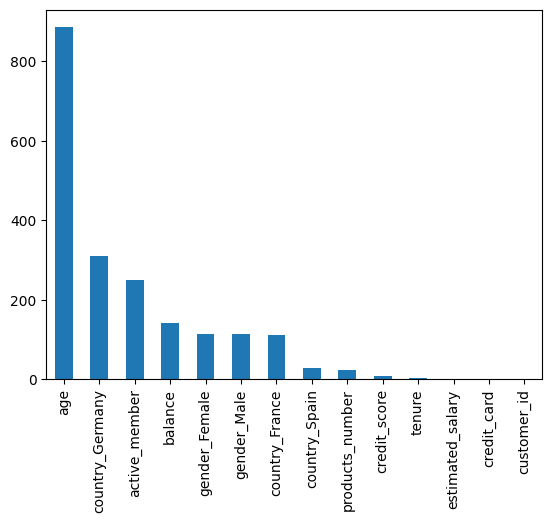

In [24]:
anova = pd.Series(_, index=X.columns)
anova.sort_values(ascending=False).plot(kind='bar')

In [25]:
from sklearn.feature_selection import mutual_info_classif

<AxesSubplot:>

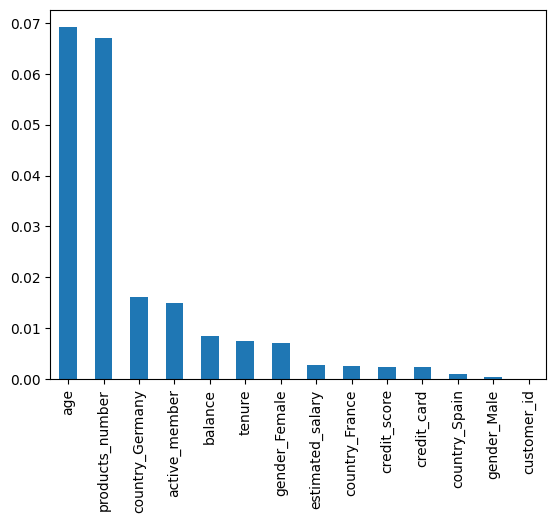

In [26]:
IG = mutual_info_classif(X,y)
IGS = pd.Series(IG, index=X.columns)
IGS.sort_values(ascending=False).plot(kind='bar')

In [27]:
from sklearn.feature_selection import VarianceThreshold

In [28]:
var_th = VarianceThreshold(threshold=0.5)
var_th.fit_transform(df)
print(var_th.get_feature_names_out())

['customer_id' 'credit_score' 'age' 'tenure' 'balance' 'estimated_salary']


In [29]:
from skfeature.function.similarity_based import fisher_score

In [30]:
# fish = fisher_score.fisher_score(X.values, y)
# f1 = pd.Series(fish, index=X.columns)
# f1.sort_values(ascending=False).plot(kind='bar')

In [31]:
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE

In [32]:
sm=SMOTE(sampling_strategy=0.90,random_state=10)
X_sm,y_sm=sm.fit_resample(X,y)

In [33]:
y_sm.value_counts()

0    7963
1    7166
Name: churn, dtype: int64

In [34]:
X_train,X_test,y_train,y_test=train_test_split(X_sm,y_sm,random_state=5,train_size=0.70)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((10590, 14), (4539, 14), (10590,), (4539,))

In [35]:
norm=MinMaxScaler()
X_train=norm.fit_transform(X_train)
X_test=norm.transform(X_test)

In [36]:
df_Xtrain=pd.DataFrame(X_train,columns=X.columns)

In [37]:
df_Xtest=pd.DataFrame(X_test,columns=X.columns)

#### Random Forest

In [38]:
# X_train,X_test,y_train,y_test=train_test_split(X_sm,y_sm,random_state=5,train_size=0.70)
# X_train.shape,X_test.shape,y_train.shape,y_test.shape

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
rf=RandomForestClassifier()
rf.fit(df_Xtrain,y_train)

RandomForestClassifier()

In [42]:
from sklearn.model_selection import RandomizedSearchCV

In [43]:
hyp={"n_estimators":np.arange(5,100,5),"criterion":["gini","entropy"],"max_depth":np.arange(2,12),"min_samples_split":np.arange(2,5),"min_samples_leaf":np.arange(1,3)}
rmcv=RandomizedSearchCV(rf,hyp,cv=5)
rmcv.fit(df_Xtrain,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
                                        'min_samples_leaf': array([1, 2]),
                                        'min_samples_split': array([2, 3, 4]),
                                        'n_estimators': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85,
       90, 95])})

In [44]:
rmcv.best_params_

{'n_estimators': 35,
 'min_samples_split': 3,
 'min_samples_leaf': 2,
 'max_depth': 11,
 'criterion': 'entropy'}

In [45]:
rf=RandomForestClassifier(n_estimators=55,min_samples_split=4,min_samples_leaf=2,max_depth=10,criterion="gini")
rf.fit(df_Xtrain,y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=4,
                       n_estimators=55)

In [47]:
def evalution(m,x,y):
    pred=m.predict(x)
    acc=accuracy_score(y,pred)
    print(f"Accuracy_score is {acc}")
    cm=confusion_matrix(y,pred)
    print(f"Accuracy_score is {cm}")
    cr=classification_report(y,pred)
    print(f"Accuracy_score is {cr}")

In [48]:
evalution(rf,df_Xtrain,y_train)

Accuracy_score is 0.919452313503305
Accuracy_score is [[5240  295]
 [ 558 4497]]
Accuracy_score is               precision    recall  f1-score   support

           0       0.90      0.95      0.92      5535
           1       0.94      0.89      0.91      5055

    accuracy                           0.92     10590
   macro avg       0.92      0.92      0.92     10590
weighted avg       0.92      0.92      0.92     10590



In [49]:
evalution(rf,df_Xtest,y_test)

Accuracy_score is 0.8772857457589778
Accuracy_score is [[2196  232]
 [ 325 1786]]
Accuracy_score is               precision    recall  f1-score   support

           0       0.87      0.90      0.89      2428
           1       0.89      0.85      0.87      2111

    accuracy                           0.88      4539
   macro avg       0.88      0.88      0.88      4539
weighted avg       0.88      0.88      0.88      4539



In [50]:
import pickle
with open("model_rf.pickle","wb") as f:
    pickle.dump(rf,f)

In [51]:
l1=list(df_Xtrain.columns)
columns={"column":l1}
columns

{'column': ['customer_id',
  'credit_score',
  'age',
  'tenure',
  'balance',
  'products_number',
  'credit_card',
  'active_member',
  'estimated_salary',
  'country_France',
  'country_Germany',
  'country_Spain',
  'gender_Female',
  'gender_Male']}

In [52]:
import json
with open("column_list.json","w") as f:
    json.dump(columns,f)